Q1: Importing and visualizing binding affinities
  1. load the dataset from Max.txt
  2. histogram of binding affinity values
  3. describe patterns, trends, or anomalies you see


* mounting the dataset in drive, run this first time only

In [ ]:
import pandas as pd # to read files
from google.colab import drive # run this first time you run the program then tag out
drive.mount("/content/drive") # same for this
dataset = pd.read_csv("/content/drive/MyDrive/Max.txt")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Setting the dataset variable correctly

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Max.txt", sep = "\t", header = None)
print(dataset.head())

                                      0         1
0  GAAGCCCTGGCGGGGCGCGTGCCCGCCGCCGCCGCC  3.737829
1  TCCCGGGGCTAGAGGCATGTGGACTCAGGAGGATGA  3.895754
2  GGCGCTGCCGGACTGCGCGTGGAGTGGCGCGCTGCT  3.797545
3  GCAGCTCGCCCGGGCCACGCGGTGCCGGCCCTCGGC  4.080446
4  GGAATTACCTTCATCCACATGGTTGAAGCTGGCTGG  4.126748


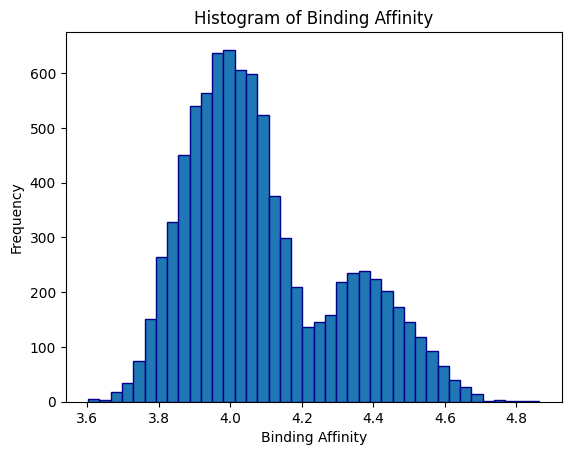

In [ ]:
import matplotlib.pyplot as plt # for histogram plotting
plt.hist(dataset[1], bins = 40, edgecolor = "darkblue")
plt.xlabel("Binding Affinity")
plt.ylabel("Frequency")
plt.title("Histogram of Binding Affinity")
plt.show()

Things I noticed about this histogram:
  * there are two frequency peaks with the main one being around 4.0 binding affinity (600+ frequency) and the second, smaller one being around 4.4 binding affinity (250+ frequency)

Q2: One-Hot Encoding of k-mers
  1. implement a fxn that takes a DNA sequence and an integer k as input and returns a 1-hot encoded vector representing all k-mers
  2. use fxn to generate the 1-hot encoded representation for the sequence 'AACTGCGT' with k=2
  3. apply this fxn to encode all DNA sequences in the dataset

In [92]:
import numpy as np # used for handling arrays
import csv # used for reading the csv file

def ohe_kmers(sequence, k):
  encoded_nucleotide = {'A': [1,0,0,0],
                 'C': [0,1,0,0],
                 'G': [0,0,1,0],
                 'T': [0,0,0,1]} # listing the possible bases in the sequence with their one-hot encode

  encoded_kmers = [] #int empty list to store the one-hot encoded kmers

  for i in range(len(sequence) - k + 1): # looping over the sequence
    kmer = sequence[i:i + k] # extracting the kmer
    oh_vector = [] # int empty list for kmers' oh vector

    for nucleotide in kmer:
      oh_vector.extend(encoded_nucleotide[nucleotide]) # extending the vector w/ ohe of each nucleotide

    encoded_kmers.append(oh_vector) # appending ohe kmer to the list

  return np.array(encoded_kmers) # returns list

dataset = pd.read_csv("/content/drive/MyDrive/Max.txt", sep = "\t", header = None)
sequences = dataset.iloc[:,0].astype(str).tolist()

if sequences[0].startswith('>'):  # Check for a FASTA-style header or other non-DNA data
    sequences = sequences[1:]  # Skip the header row

sequence = 'AACTGCGT' # DNA sequence
k = 2 # length of kmer
encoded_kmers = ohe_kmers(sequence, k)
encoded_sequences = []

# printing the one-hot encoded kmers
print(f"One-hot encoded k-mers for sequence '{sequence}':") # using F-string to embed actual sequence
for encoded in encoded_kmers:
  print(encoded) # prints each encoded kmer
print() # separation line

for sequence in sequences:
  print(f"One-hot encoded k-mers for sequence '{sequence}':")
  encoded_kmers = ohe_kmers(sequence, k) # using k=2 for 2-mer encoding
  encoded_sequences.append(encoded_kmers) # adding encoded kmers to the list
  for encoded in encoded_kmers:
    print(encoded)
  print()

Streaming output truncated to the last 5000 lines.
[0 0 0 1 0 0 0 1]
[0 0 0 1 1 0 0 0]
[1 0 0 0 0 0 0 1]
[0 0 0 1 0 1 0 0]

One-hot encoded k-mers for sequence 'GGCTCGCCTGAGGGCAACGTGGGGCTTCCTGCTTTG':
[0 0 1 0 0 0 1 0]
[0 0 1 0 0 1 0 0]
[0 1 0 0 0 0 0 1]
[0 0 0 1 0 1 0 0]
[0 1 0 0 0 0 1 0]
[0 0 1 0 0 1 0 0]
[0 1 0 0 0 1 0 0]
[0 1 0 0 0 0 0 1]
[0 0 0 1 0 0 1 0]
[0 0 1 0 1 0 0 0]
[1 0 0 0 0 0 1 0]
[0 0 1 0 0 0 1 0]
[0 0 1 0 0 0 1 0]
[0 0 1 0 0 1 0 0]
[0 1 0 0 1 0 0 0]
[1 0 0 0 1 0 0 0]
[1 0 0 0 0 1 0 0]
[0 1 0 0 0 0 1 0]
[0 0 1 0 0 0 0 1]
[0 0 0 1 0 0 1 0]
[0 0 1 0 0 0 1 0]
[0 0 1 0 0 0 1 0]
[0 0 1 0 0 0 1 0]
[0 0 1 0 0 1 0 0]
[0 1 0 0 0 0 0 1]
[0 0 0 1 0 0 0 1]
[0 0 0 1 0 1 0 0]
[0 1 0 0 0 1 0 0]
[0 1 0 0 0 0 0 1]
[0 0 0 1 0 0 1 0]
[0 0 1 0 0 1 0 0]
[0 1 0 0 0 0 0 1]
[0 0 0 1 0 0 0 1]
[0 0 0 1 0 0 0 1]
[0 0 0 1 0 0 1 0]

One-hot encoded k-mers for sequence 'ACGCACAGCGCCGGCCTCGTGGTCCGGCGGCCGCAG':
[1 0 0 0 0 1 0 0]
[0 1 0 0 0 0 1 0]
[0 0 1 0 0 1 0 0]
[0 1 0 0 1 0 0 0]
[1 0 0 0 0 1 0 0]
[0 

Q3: Effect of Regularization on a 1-mer Model
  1. train linear regression model using one-hot encoded 1-mer representations and compute the training and test loss
  2. apply L2 regularization (ridge regression) with different values of alpha:
    alpha = 0 (no regularization)
    alpha = 0.1 (small regularization)
    alpha = 10 (large regularization)
  3. plot a line graph with:
    x-axis: alpha values
    y-axis: mean squared error (MSE)
    separate lines: training loss and test loss

In [90]:
print(dataset.head())

                                      0         1
0  GAAGCCCTGGCGGGGCGCGTGCCCGCCGCCGCCGCC  3.737829
1  TCCCGGGGCTAGAGGCATGTGGACTCAGGAGGATGA  3.895754
2  GGCGCTGCCGGACTGCGCGTGGAGTGGCGCGCTGCT  3.797545
3  GCAGCTCGCCCGGGCCACGCGGTGCCGGCCCTCGGC  4.080446
4  GGAATTACCTTCATCCACATGGTTGAAGCTGGCTGG  4.126748


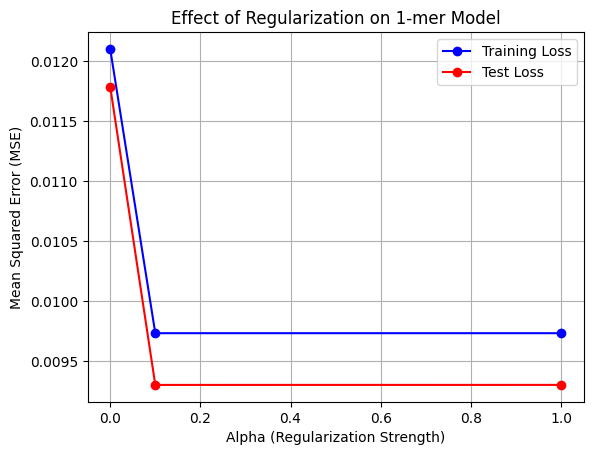

In [95]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

dataset = pd.DataFrame(dataset) # converts list to data frame
targets = dataset.iloc[:,1].tolist() # binding affinities (targets) in second column
sequences = dataset.iloc[:,0].astype(str).tolist() # sequences in the first column

k = 2
encoded_sequences = []

for seq, target in zip(sequences, targets):
  encoded_kmers = ohe_kmers(seq, k)
  flattened_kmers = encoded_kmers.flatten()
  encoded_sequences.append(flattened_kmers)

encoded_sequences = np.array(encoded_sequences)
targets = np.array(targets)

X_train, X_test, Y_train, Y_test = train_test_split(encoded_sequences, targets, test_size = 0.2, random_state = 42)
alpha_values = [0, 0.1, 10] # Different alpha values for ridge regularization
train_losses = [] # int empty list to store training losses for each alpha value
test_losses = [] # int empty list to store test losses for each alpha value

for alpha in alpha_values:
  model = Ridge(alpha = alpha) # ridge regression model w/ specified alpha
  model.fit(X_train, Y_train) # fits the model of the training data

  Y_train_pred = model.predict(X_train)
  Y_test_pred = model.predict(X_test) # prediciting on training and test sets

  train_losses.append(mean_squared_error(Y_train, Y_train_pred))
  test_losses.append(mean_squared_error(Y_test, Y_test_pred)) # computing MSE for training and test sets


# plotting the results
plt.plot(alpha_values, train_losses, label="Training Loss", marker = "o", color = "blue")
plt.plot(alpha_values, test_losses, label = "Test Loss", marker = "o", color = "red")
plt.xlabel("Alpha (Regularization Strength)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Effect of Regularization on 1-mer Model")
plt.legend()
plt.grid(True)
plt.show()

1. How do different values of alpha affect training and test loss?
As alpha increases the training loss typically increased as well, too high of regularization causes underfitting.
2. Does regularization help improve the model in this case? Explain your observations.
Regularization does help improve the model, but only to a certain extent...0.1 was the correct balance whereas 10 is too much an tanks the training loss.

Q4: Examining Model Complexity (1-mer to 4-mer)

  1. Train four linear regression models using one-hot encoded representations for:
    1-mer, 2-mer, 3-mer, and 4-mer
  2. Plot a line graph with:
    x-axis: model complexity (1-mer to 4-mer)
    y-axis: mean square error (MSE)
    separate lines: training loss and test loss

Streaming output truncated to the last 5000 lines.
Shape of encoded_kmers for sequence AAGCAAACCCCCCAACACGTGTTTCCTAGTTGGGAA: (33, 16)
Shape of encoded_kmers for sequence AAGCAAACCCCCCAACACGTGTTTCCTAGTTGGGAA: (33, 16)
Shape of encoded_kmers for sequence AAGCAAACCCCCCAACACGTGTTTCCTAGTTGGGAA: (33, 16)
Shape of encoded_kmers for sequence AAGCAAACCCCCCAACACGTGTTTCCTAGTTGGGAA: (33, 16)
Shape of encoded_kmers for sequence AAGCAAACCCCCCAACACGTGTTTCCTAGTTGGGAA: (33, 16)
Shape of encoded_kmers for sequence AAGCAAACCCCCCAACACGTGTTTCCTAGTTGGGAA: (33, 16)
Shape of encoded_kmers for sequence AAGCAAACCCCCCAACACGTGTTTCCTAGTTGGGAA: (33, 16)
Shape of encoded_kmers for sequence AAGCAAACCCCCCAACACGTGTTTCCTAGTTGGGAA: (33, 16)
Shape of encoded_kmers for sequence AAGCAAACCCCCCAACACGTGTTTCCTAGTTGGGAA: (33, 16)
Shape of encoded_kmers for sequence AAGCAAACCCCCCAACACGTGTTTCCTAGTTGGGAA: (33, 16)
Shape of encoded_kmers for sequence AAGCAAACCCCCCAACACGTGTTTCCTAGTTGGGAA: (33, 16)
Shape of encoded_kmers for sequence 

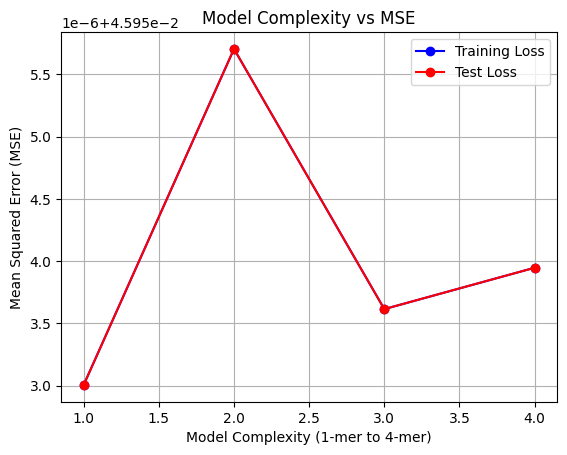

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

alpha_values = [0.0001, 0.001, 0.01, 0.1, 1.0]
k_values = [1, 2, 3, 4]
cv_train_losses = []
cv_test_losses = []

for k in k_values:
  encoded_sequences = []
  for seqeuence in sequences:
    encoded_kmers = ohe_kmers(sequence, k)
    print(f"Shape of encoded_kmers for sequence {sequence}: {encoded_kmers.shape}")
    flattened_kmers = encoded_kmers.flatten()
    encoded_sequences.append(flattened_kmers)
  print(f"Number of encoded sequences: {len(encoded_sequences)}") # Check the length of encoded sequences
  print(f"Number of sequences: {len(sequences)}")

  X = np.array(encoded_sequences)
  assert len(X) == len(targets), "X and Y have different number of samples!"
  Y = np.array (targets) # converting data into numpy arrays

  print(f"Shape of X: {X.shape}")
  print(f"Length of Y: {len(Y)}")

  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

  #adjusting for over/underfitting
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
  model = SGDRegressor(learning_rate = "adaptive", alpha = 0.0001, tol = 1e-4, random_state = 42)
  model.fit(X_train, Y_train) # training the model

  # cross-validation to try to combat underfitting...
  cv_scores = cross_val_score(model, X, Y, cv = 5, scoring = "neg_mean_squared_error")
  print(f"Cross-validation scores for k={k}: {-cv_scores}")
  mean_cv_score = -cv_scores.mean()
  print(f"Average CV MSE for k={k}: {mean_cv_score}")

  Y_train_pred = model.predict(X_train)
  Y_test_pred = model.predict(X_test)

  cv_train_losses.append(mean_cv_score)
  cv_test_losses.append(mean_cv_score)

# plotting
plt.plot(k_values, cv_train_losses, label = "Training Loss", marker = 'o', color = "blue")
plt.plot(k_values, cv_test_losses, label = "Test Loss", marker = 'o', color = "red")
plt.xlabel("Model Complexity (1-mer to 4-mer)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Model Complexity vs MSE")
plt.legend()
plt.grid(True)
plt.show()

Analyze the impact of increasing model complexity:

    1. Does the training loss always decrease as complexity increases?
    2. What happens to the test loss as the model becomes more complex?
    3. Is there overfitting in these models? If yes:
      * Apply a method to address overfitting (if none you can skip)
      * Report the performance after addressing overfitting and update the plot by incorporating the new data point (if none you can skip)
    4. Which model exhibits the best balance between bias and variance? Justify your answer based on the training and test loss trends.

1. No, the training loss remains constant across the different complexity levels...normally we expect training loss to decrease as complexity increases since a more complex model should fit the data better...this model displays underfitting

2. The test loss also remains constant which suggest the model isn't improving or learning with increasing complexities...this could be due to the features not capturing meaningful differences, having too strong of regularization, or issues with the data preprocessing

3. No, there isn't overfitting in this dataset which would be represented by a low training loss with a high test loss...model is underfitting

4. Because the loss values are stagnant across all model complexities it suggests the model has a high bias and is likely underfitting...the best balance between bias and variance isn't clear because increasing complexity doesn't change performance.

In [ ]:
#@title Convert ipynb to HTML in Colab
# Upload ipynb
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")